# Übung 4

**Gruppenname: TSRI**

- Christian Rene Thelen @cortex359
- Leonard Schiel @leo_paticumbum
- Marine Raimbault @Marine Raimbault
- Alexander Ivanets @sandrium

### In dieser Übung ...

werden Sie verschiedene Datensätze explorieren und dabei Ihre EDA-Fertigkeiten trainieren.

### 4.1 Visualisierung Teil 1 (Lebenserwartung)

In dieser Übung geht es darum, dass Sie Ihre Pandas- und Visualisierungs-Fähigkeiten weiter verfeinern. Wir werden die Entwicklung der Lebenserwartung der Weltbevölkerung in den letzten 200 Jahren untersuchen.

**Ihre Daten**

Die Daten stammen aus unterschiedlichen Datenquellen (unter anderem den United Nations, dem Institute for Health Metrics and Evaluation, der Human Mortality Database des Max Plank Instituts für demografische Forschung und der University of California Berkeley), die von der Gapminder Stiftung zusammengefasst wurden. Sie finden die Daten hier:

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/life_expectancy_years.csv).

**Ihre Aufgaben**

(1) Welche Erwartungshaltung haben Sie - ohne dass Sie vorher recherchieren: Was war die durchschnittliche Lebenserwartung eines Menschen zu Beginn des 19. Jahrhunderts (also 18XX) und im Jahr 2018? (1-3 Sätze)

35 Jahre

(2) Importieren und untersuchen Sie den hinterlegten Datensatz: Für welche Zeitspanne sind Daten hinterlegt?

In [59]:
import pandas as pd
life_expectancy = pd.read_csv("life_expectancy_years.csv")

Für den Zeitraum von 1800 bis 2017 in Jahresschritten.

(3) Erstellen Sie eine Visualisierung der weltweiten Lebenserwartung (y-Achse) über die Jahre (x-Achse) hinweg. Halten Sie sich an die Regeln guter Visualisierung. Achten Sie auf Achsenbeschriftungen.

* Hinweis: Zur Bearbeitung dieser Aufgabe werden Sie im Netz recherchieren müssen.

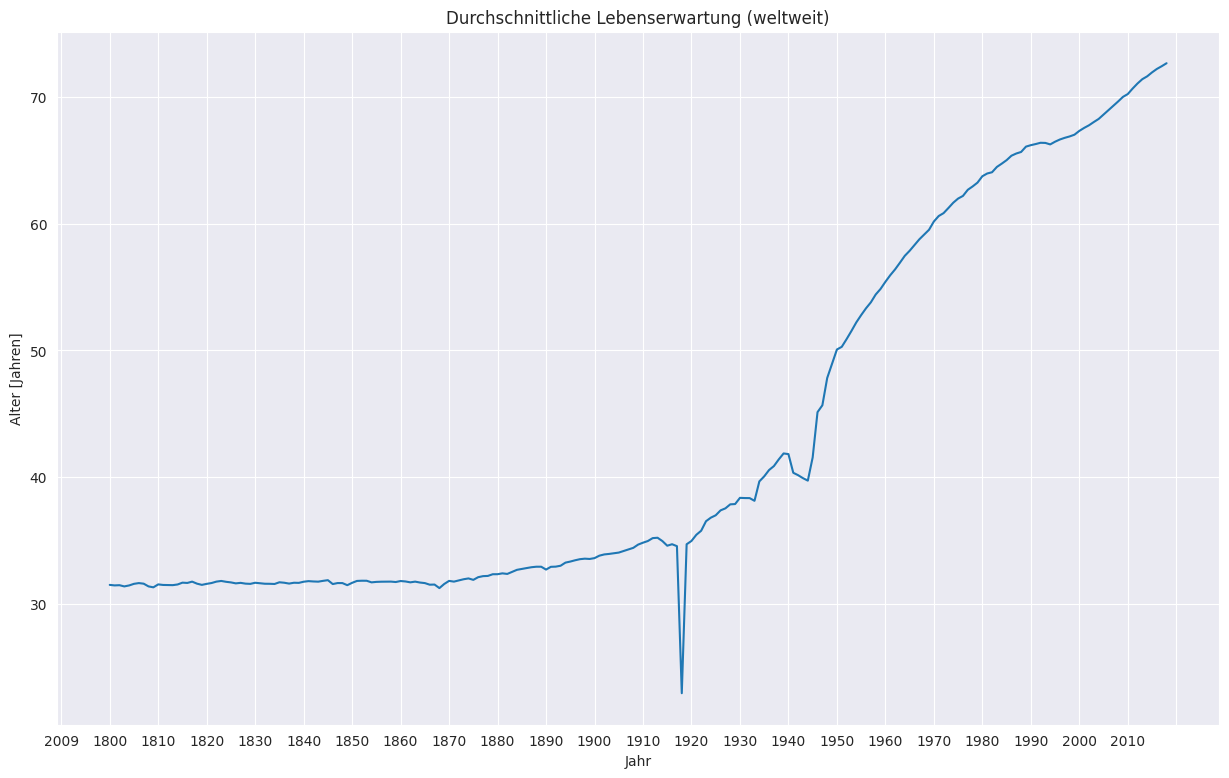

In [60]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15, 9))
plt.title("Durchschnittliche Lebenserwartung (weltweit)")
plt.xlabel("Jahr")
plt.ylabel("Alter [Jahren]")

plt.tick_params(axis='x', which='both')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
life_expectancy.loc[:, "1800":].mean().plot()
plt.show()

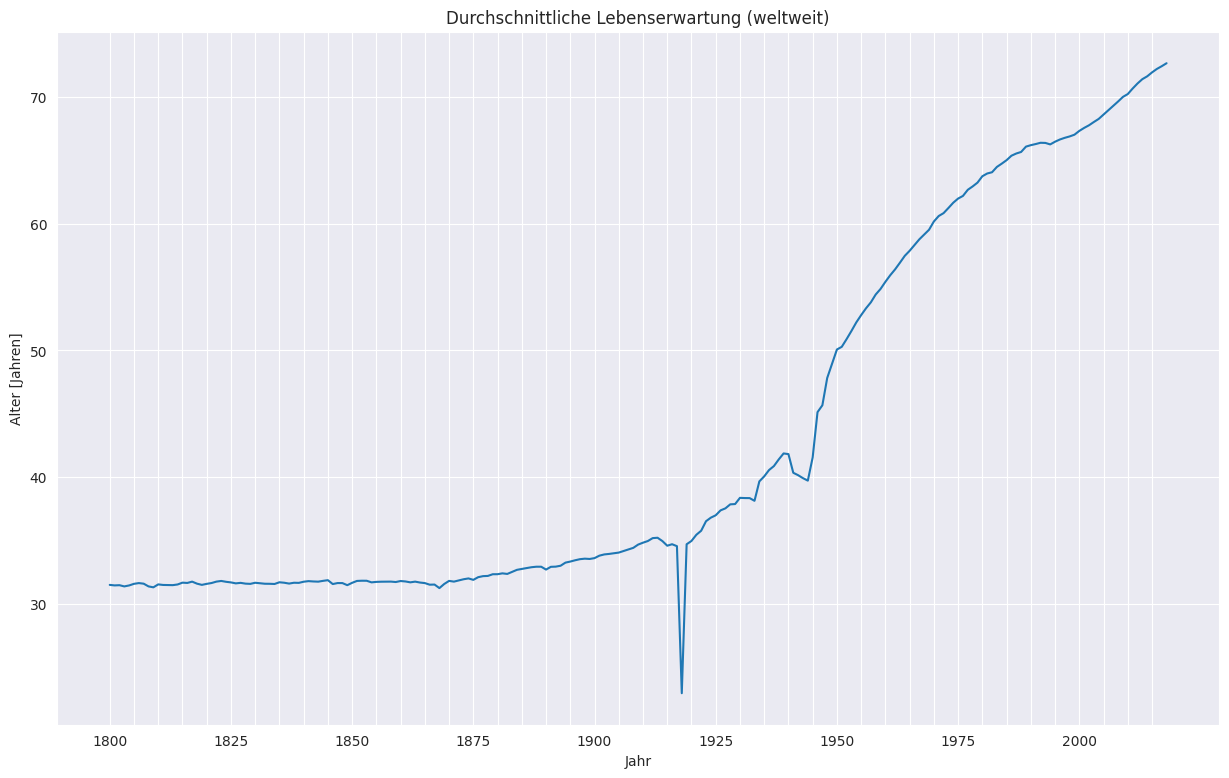

In [61]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15, 9))
plt.title("Durchschnittliche Lebenserwartung (weltweit)")
plt.xlabel("Jahr")
plt.ylabel("Alter [Jahren]")

y = life_expectancy.loc[:, "1800":].mean().values
plt.plot(y)
plt.xticks(np.arange(0, 217, 5), [i if i % 25 == 0 else "" for i in np.arange(1800, 2017, 5)])
plt.show()

In [62]:
life_expectancy.loc[:, "1800":].mean()

1800    31.502717
1801    31.461957
1802    31.478804
1803    31.383152
1804    31.459239
          ...    
2014    71.622995
2015    71.933690
2016    72.206952
2017    72.422283
2018    72.658152
Length: 219, dtype: float64

(4) Vergleichen Sie Ihre Abbildung mit Ihrer Erwartungshaltung aus Schritt (1). Wurden Sie überrascht? Falls ja, inwiefern? (1-3 Sätze)

Lag nur um 4 Jahre daneben.

(5) Führen Sie eine kurze Recherche durch: Welche Ereignisse könnten die Einbrüche in der weltweiten Lebenserwartung, die Sie zu bestimmten Zeiten beobachten, erklären?

Angenommen hätte ich Dips zu den beiden Weltkriegen, jedoch ist der größte Einbruch der durchschnittlichen Lebenserwartung im Jahre 1918 auf Grund der spanischen Grippe passiert.

https://www.spiegel.de/geschichte/grippe-katastrophe-von-1918-19-a-948269.html

(6) \[Optional\]: Vergleichen Sie die weltweite Lebenserwartung mit der von Deutschland: Erstellen Sie eine Visualisierung, die beide Graphen zeigt, und interpretieren Sie diese. (1-3 Sätze).

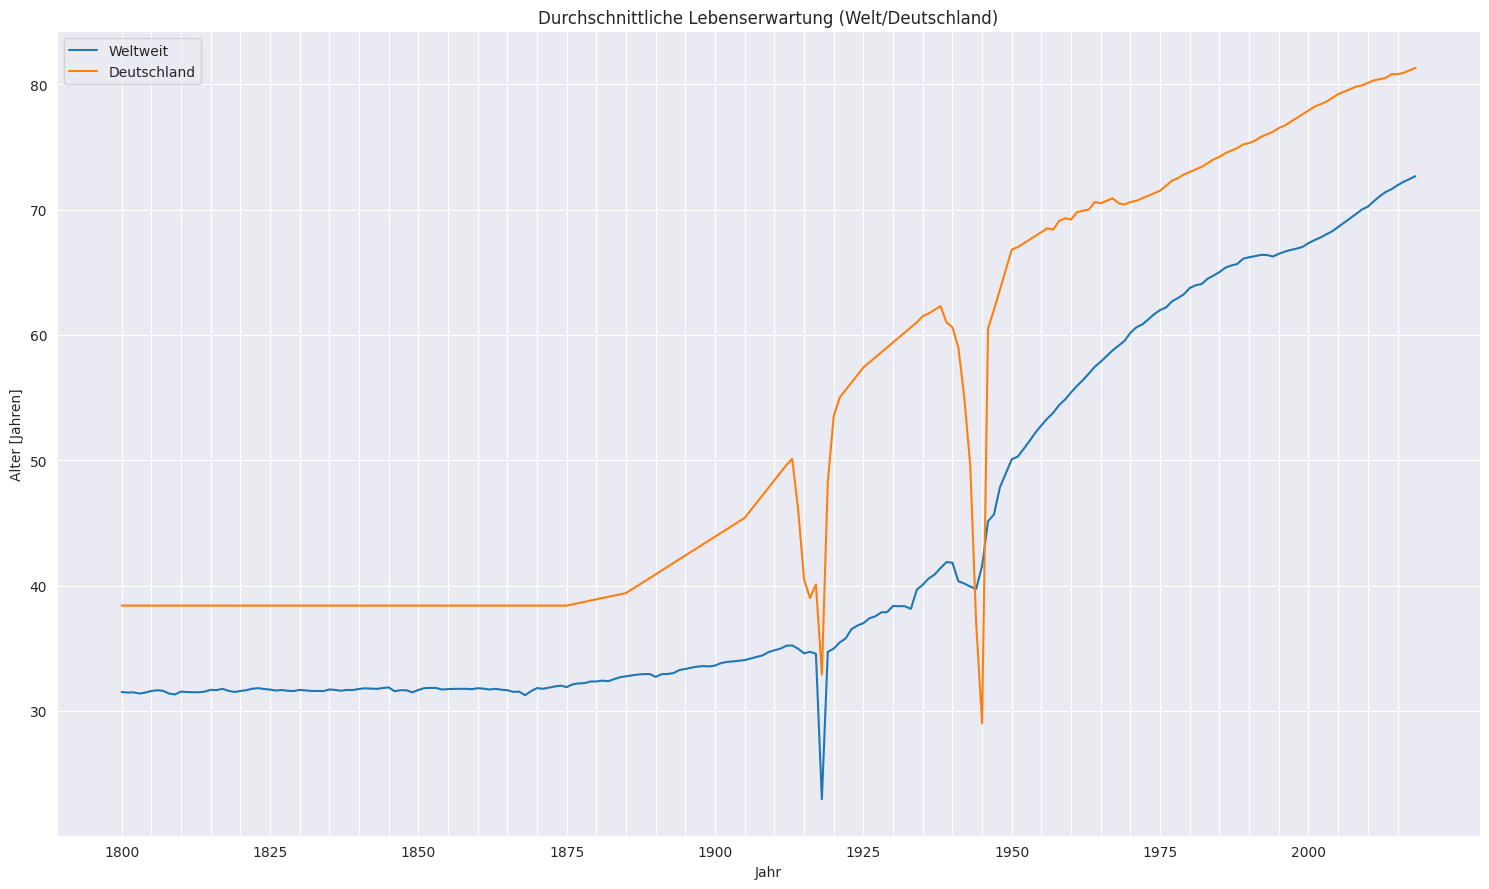

In [63]:
fig, ax = plt.subplots(figsize=(15, 9))
plt.title("Durchschnittliche Lebenserwartung (Welt/Deutschland)")
plt.xlabel("Jahr")
plt.ylabel("Alter [Jahren]")

y_1 = life_expectancy.loc[:, "1800":].mean().values
y_2 = life_expectancy.loc[life_expectancy["country"] == "Germany", "1800":].values.transpose()
plt.plot(y_1, label="Weltweit")
plt.plot(y_2, label="Deutschland")
plt.xticks(np.arange(0, 220, 5), [i if i % 25 == 0 else "" for i in np.arange(1800, 2017, 5)])
plt.legend()
plt.tight_layout()
plt.show()

Die durchschnittliche Lebenserwartung lag in Deutschland lange ca. acht Jahre über dem weltweiten Durchschnitt. Zwischen 1940 und 1945 ist jedoch ein tiefer Einschnitt zu entdecken, der mit dem 2. Weltkrieg und dem NS Regime zusammenhängen dürfte. 

### 4.2 Visualisierung Teil 2 (Geburtenraten)

Dies ist eine Fortsetzung von vorherigen Übungsaufgaben. Wir kommen noch einmal auf Daten der Gapminder Stiftung zurück, um Geburtenraten weltweit zu untersuchen.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/children_per_woman_total_fertility.csv).

**Randbemerkung**

Im Rahmen dieser Aufgabe wollen wir unter dem Begriff "Geburtenrate" die Gesamtfertilitätsrate (*total fertility rate*) verstehen, wie Sie sie direkt im Datensatz angegeben finden. Dies ist die durchschnittliche Anzahl von Kindern, die eine Frau im Laufe ihres Lebens bekommt. Die Forschung [unterscheidet](https://web.archive.org/web/20220502150023/https://www.gbe-bund.de/gbe/abrechnung.prc_abr_test_logon?p_uid=gast&p_aid=0&p_knoten=FID&p_sprache=D&p_suchstring=12693) allerdings zwischen verschiedenen Fertilitätsindikatoren (z.B. zwischen sogenannten Geburtenziffern, Fertilitätsraten und Reproduktionsraten). Falls Sie also einmal mit einem Bevölkerungswissenschaftler sprechen sollten: Sie untersuchen hier im Rahmen dieser Aufgabe die Gesamtfertilitätsrate.

**Ihre Aufgaben**

(1) Importieren Sie den oben aufgeführten Datensatz.

In [64]:
#!wget 'https://data.bialonski.de/ds/children_per_woman_total_fertility.csv'
fertility = pd.read_csv('children_per_woman_total_fertility.csv')

(2) Visualisieren Sie die weltweite Geburtenrate (y-Achse) als Funktion der Zeit (Jahre, x-Achse). Achten Sie auf die Regeln guter Visualisierung, wie Sie sie in der Vorlesung kennengelernt haben. Beschriften Sie alle Achsen.

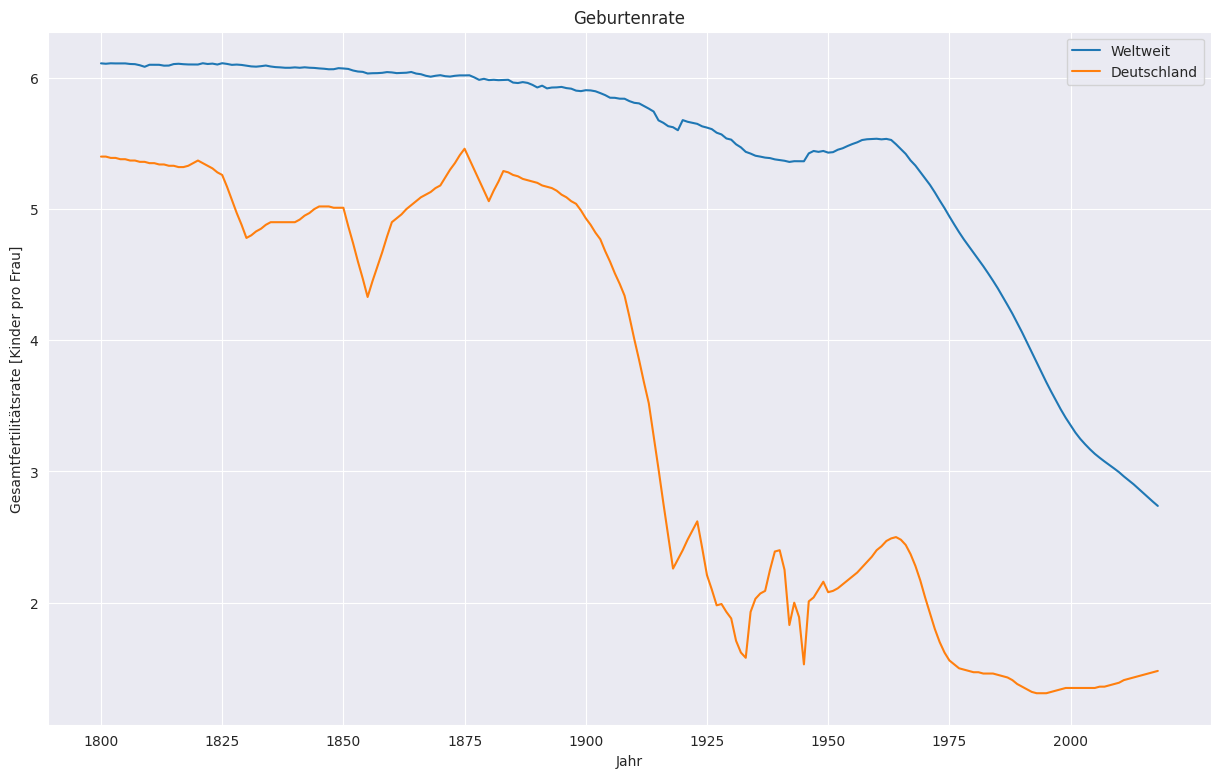

In [65]:
fig, ax = plt.subplots(figsize=(15, 9))
plt.title("Geburtenrate")
y_welt: pd.DataFrame = fertility.loc[:, "1800":].mean()
y_de: pd.DataFrame = fertility.loc[fertility["country"] == "Germany", "1800":].mean()
plt.plot(y_welt.values, label="Weltweit")
plt.plot(y_de.values, label="Deutschland")
plt.xlabel("Jahr")
plt.ylabel("Gesamtfertilitätsrate [Kinder pro Frau]")
plt.legend()
plt.xticks(np.arange(0, 218, 25), fertility.columns[1::25])
plt.show()

(3) Ab wann geht die Geburtenrate weltweit besonders stark zurück? (ungefähre Jahreszahl). Welche Hypothesen haben Sie, warum dieser Rückgang zu beobachten ist?

Ab 1963 ist ein stetiger Rückgang zu beobachten. In Europa könnte dies auf das Ende des Baby Booms nach dem 2. Weltkrieg zurückzuführen sein. Global dürften aber die sinkende Kindersterblichkeit die größte Rolle gespielt haben.

(4) Ermitteln Sie für jedes Jahr das Land, in dem die Geburtenrate am meisten zurückging. (Ein *Pandas Series* Objekt).

In [66]:
fertility_change: pd.DataFrame = fertility.set_index("country") - fertility.set_index("country").shift(1, axis=1)
# äquivalent zu 
# fertility_change: pd.DataFrame = fertility.set_index("country").diff(periods=1, axis=1)

fertility_change

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,-0.21,-0.22,-0.22,-0.22,-0.21,-0.19,-0.18,-0.16,-0.16,-0.15
Albania,NaN,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.00
Algeria,NaN,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.08,0.06,0.04,0.01,-0.02,-0.03,-0.05,-0.06,-0.07,-0.07
Angola,NaN,0.0,0.00,0.0,0.0,0.00,0.0,0.01,0.00,0.0,...,-0.07,-0.08,-0.08,-0.08,-0.08,-0.08,-0.07,-0.08,-0.07,-0.07
Antigua and Barbuda,NaN,0.0,-0.01,0.0,0.0,-0.01,0.0,-0.01,0.00,0.0,...,-0.01,-0.02,-0.01,-0.02,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,NaN,0.0,0.01,0.0,0.0,0.01,0.0,0.00,0.01,0.0,...,-0.03,-0.03,-0.03,-0.02,-0.03,-0.02,-0.03,-0.02,-0.03,-0.02
Vietnam,NaN,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.02,0.01,0.00,0.01,0.00,0.00,0.00,-0.01,0.00,0.00
Yemen,NaN,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,-0.14,-0.13,-0.12,-0.11,-0.11,-0.11,-0.12,-0.10,-0.11,-0.10


In [67]:
for year in fertility_change.columns[1:]:
    print(f"{year} {fertility_change[year].idxmin():<25} {fertility_change[year].min():1.4f}")

1801 United Kingdom            -0.3700
1802 Norway                    -0.1600
1803 Finland                   -0.4500
1804 Norway                    -0.2600
1805 United Kingdom            -0.1000
1806 Finland                   -0.3700
1807 Norway                    -0.1200
1808 Finland                   -0.8100
1809 Norway                    -0.7900
1810 Philippines               -0.0700
1811 Finland                   -0.4400
1812 Sweden                    -0.2500
1813 Sweden                    -0.5400
1814 Norway                    -0.2300
1815 Barbados                  -0.0300
1816 United Kingdom            -0.2900
1817 Norway                    -0.3800
1818 Norway                    -0.2400
1819 Finland                   -0.2700
1820 Poland                    -0.2700
1821 Germany                   -0.0200
1822 Finland                   -0.7500
1823 Poland                    -0.2700
1824 Finland                   -0.3700
1825 United Kingdom            -0.0400
1826 Poland              

(5) Ermitteln Sie mit Ihrem Ergebnis aus Schritt (4) das Land, dessen Geburtenrate Ende der 80er und Anfang der 90er Jahre am stärksten zurückging. Um welches Land handelt es sich?

In [68]:
fertility_change.loc[:, "1988":"1991"].idxmin(axis=0)

1988    Kuwait
1989      Iran
1990      Iran
1991      Iran
dtype: object

<!--
- Im Jahr 1988 verzeichnete **Singapore** den stärksten Rückgang der Geburtenrate, eine Veränderung um -0.34 Kinder pro Frau.
- In den 90er-Jahren war der stärkste Rückgang der Geburtenraten auf der Insel **Timor-Leste** (oder auch **Osttimor**), einem Staat in Südostasien, der die Hälfte der Insel Timor für sich beansprucht.
-->

Im Zeitraum von 1989 bis 1991 war der größte jährliche Geburtenrückgang im Iran. Eine Veränderung um -0.99 Kinder pro Frau in nur drei Jahren. 

(6) Visualisieren Sie den Zeitverlauf der Geburtenraten für das Land, welches Sie in Schritt (5) identifiziert haben. Achten Sie auf die Regeln guter Visualisierung, die Sie in der Vorlesung kennengelernt haben. Was Sie beobachten, zählt zu den schnellsten Geburtenrückgängen der Weltgeschichte.

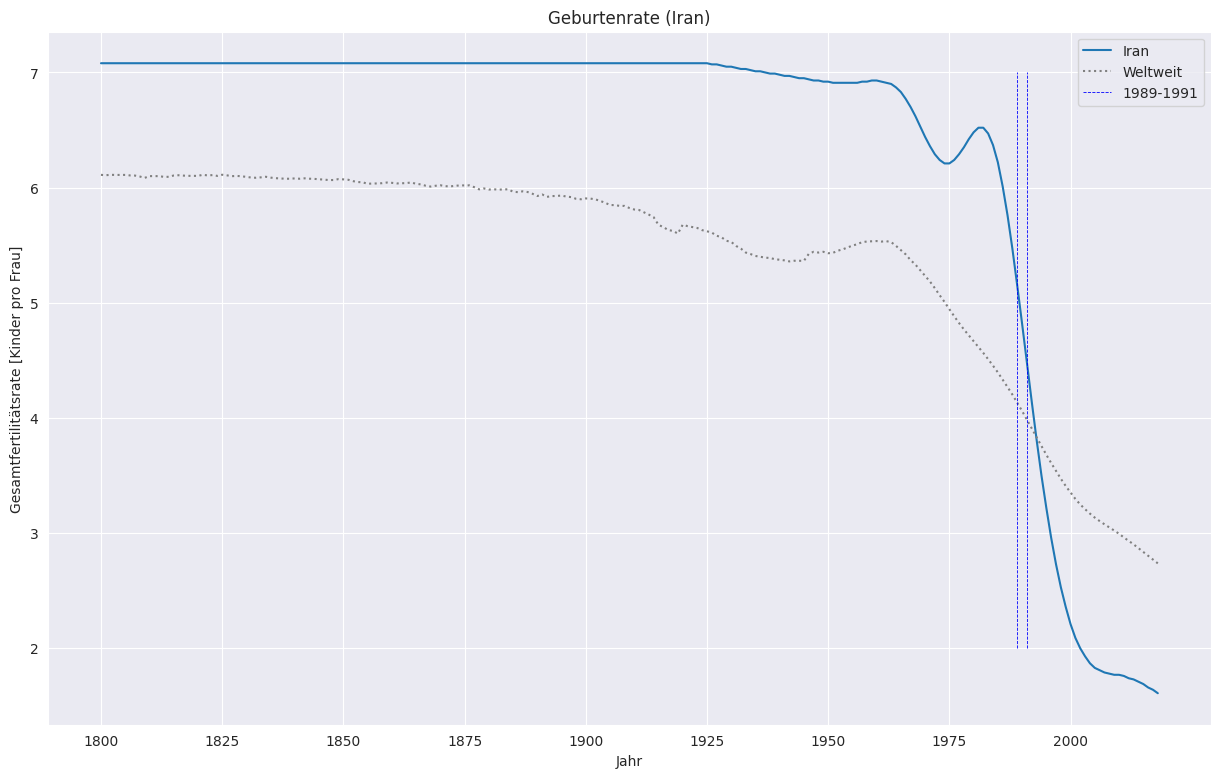

In [69]:
fig, ax = plt.subplots(figsize=(15, 9))
plt.title("Geburtenrate (Iran)")
y_welt: pd.DataFrame = fertility.loc[:, "1800":].mean()
y_sg: pd.DataFrame = fertility.loc[fertility["country"] == "Singapore", "1800":].mean()
y_tl: pd.DataFrame = fertility.loc[fertility["country"] == "Timor-Leste", "1800":].mean()
y_ir: pd.DataFrame = fertility.loc[fertility["country"] == "Iran", "1800":].mean()

plt.plot(y_ir.values, label="Iran")
plt.plot(y_welt.values, linestyle=":", color="grey", label="Weltweit")
plt.xlabel("Jahr")
plt.ylabel("Gesamtfertilitätsrate [Kinder pro Frau]")
plt.vlines(x=[189, 191], ymin=2, ymax=7, colors='blue', linestyles='--', linewidth=0.6, label="1989-1991")

plt.legend()
plt.xticks(np.arange(0, 218, 25), fertility.columns[1::25])
plt.show()

(7) Fügen Sie der Abbildung aus Schritt (6) noch die Geburtenrate der USA als zusätzlichen Graphen hinzu. Beschreiben Sie grob den qualitativen Unterschied, den Sie feststellen (1-3 Sätze).

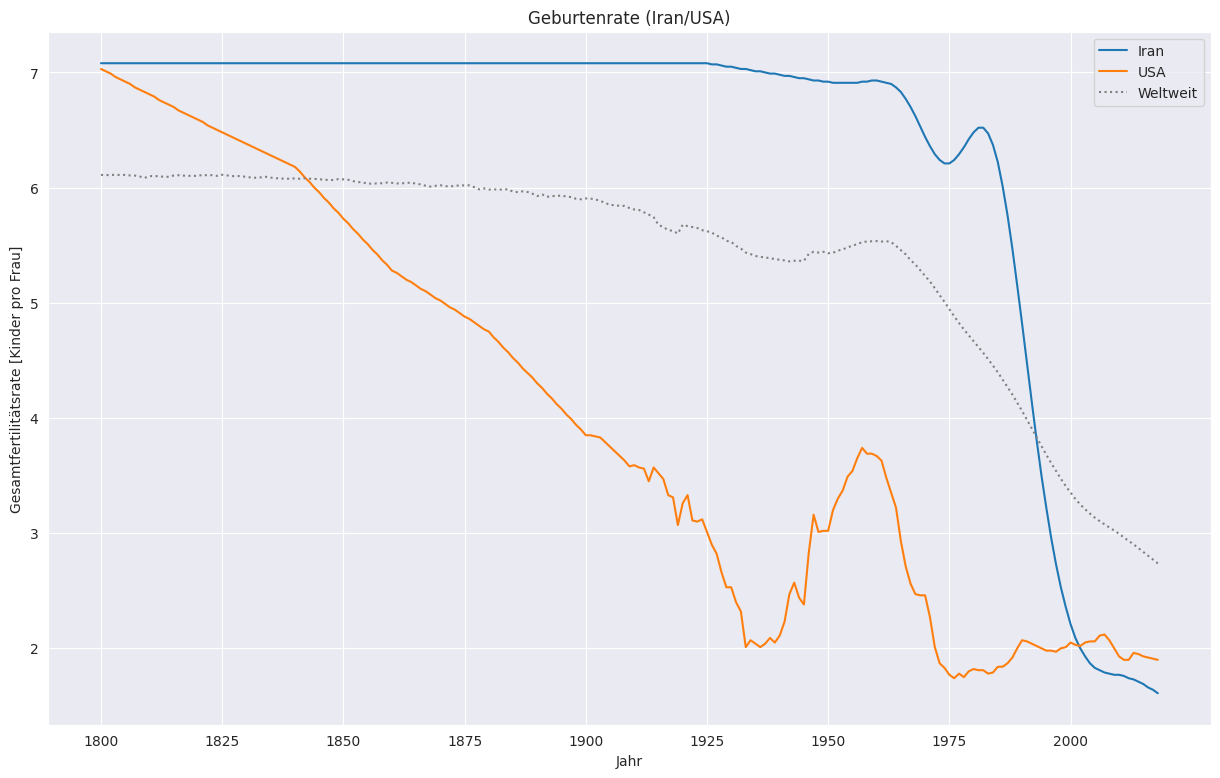

In [70]:
fig, ax = plt.subplots(figsize=(15, 9))
plt.title("Geburtenrate (Iran/USA)")
y_welt: pd.DataFrame = fertility.loc[:, "1800":].mean()
y_us: pd.DataFrame = fertility.loc[fertility["country"] == "United States", "1800":].mean()
y_ir: pd.DataFrame = fertility.loc[fertility["country"] == "Iran", "1800":].mean()

plt.plot(y_ir.values, label="Iran")
plt.plot(y_us.values, label="USA")
plt.plot(y_welt.values, linestyle=":", color="grey", label="Weltweit")
plt.xlabel("Jahr")
plt.ylabel("Gesamtfertilitätsrate [Kinder pro Frau]")

plt.legend()
plt.xticks(np.arange(0, 218, 25), fertility.columns[1::25])
plt.show()

Die Geburtenraten in den USA unterliegen ab 1910 schärferen Änderungen, während die Kurve vom Iran sehr glatt ist. Eine mögliche Erklärung könnte in der Erhebungsfrequenz der Daten liegen – vielleicht wurden fehlende Daten für den Iran interpoliert. 


Beschreibung der Geburtenrateentwicklung in Iran und in den Vereinigten Staaten von 1800 bis 2000:
- Wir sehen, dass im Jahre 1800 sowohl Iran als auch die Vereinigten Staaten eine ähnliche Geburtenrate hatten, nämlich 7 Kinder pro Frau im Jahr 1800, die bis zum Jahr 2000 auf ungefähr 2 Kinder pro Frau sank.
- Der Hauptunterschied besteht darin, wie schnell sich diese Rate entwickelt hat. In den Vereinigten Staaten gab es eine allmähliche lineare Senkung der Geburtenrate, von etwa 1 Kind pro Frau alle 50 Jahre zwischen 1800 und 1900. Während dieses Zeitraums blieb die Geburtenrate im Iran stabil bei 7 Kindern pro Frau. In den 1950er Jahren stieg die Geburtenrate in den Vereinigten Staaten von 2 auf fast 4 Kinder pro Frau, während sie im Iran von 7 auf 6 Kinder senkte.
- Aber plötzlich in den 1980er Jahren gab es einen dramatischen Rückgang der Geburtenrate im Iran, von 7 Kindern pro Frau im Jahr 1980 auf 3 Kinder pro Frau im Jahr 2000 also ein Rückgang von 4 Kinder pro Frau in weniger als 30 Jahre. Im Gegensatz dazu gab es in den Vereinigten Staaten einen langsameren Rückgang der Geburtenrate von 4 Kindern pro Frau in den 1950er Jahren auf 2 Kinder pro Frau im Jahr 1990.

**Schlussbemerkung**
 _Der Iran verbesserte Ende des 20. Jahrhunderts die medizinische Versorgung und die Bildung der Bürger deutlich. Eine obligatorische Sexualaufklärung, einfacher Zugang zu Verhütungsmitteln (unter anderem zur Pille) sowie eine im Iran befindliche Kondomfabrik (die in den 90er Jahren größte Kondomfabrik weltweit) werden zu den verschiedenen Faktoren gezählt, die den Geburtenrückgang erklären._

### 4.3 Multivariate explorative Analyse (Mietspiegel)

In vielen Städte und Gemeinden werden sogenannte Mietspiegel erstellt, die eine Marktübersicht zu Miethöhen bereitstellen. Diese werden gerne von Sachverständigen, Vermietern und Mietinteressenten zurate gezogen. In §558, Absatz (2) des bürgerlichen Gesetzbuchs ist die ortsübliche Vergleichsmiete definiert:

> „Die ortsübliche Vergleichsmiete wird gebildet aus den üblichen Entgelten, die in der Gemeinde oder einer vergleichbaren Gemeinde für Wohnraum vergleichbarer Art, Größe, Ausstattung, Beschaffenheit und Lage einschließlich der energetischen Ausstattung und Beschaffenheit in den letzten vier Jahren vereinbart oder, von Erhöhungen nach §560 abgesehen, geändert worden sind.“

Das bedeutet für die Nettomiete, dass ihr Durchschnittswert in Abhängigkeit von Merkmalen wie Art, Größe, Ausstattung, Beschaffenheit und Lage der Wohnung zu bestimmen bzw. zu schätzen ist.

Im Rahmen dieser Übung werden Sie einen Mietspiegel aus München untersuchen, einer Gegend, die bekannt für außerordentlich hohe Mieten ist.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/mietspiegel2015.txt).

**Ihre Aufgaben**

(1) Importieren Sie die Daten.

In [71]:
#!wget -nc 'https://data.bialonski.de/ds/mietspiegel2015.txt'
mietspiegel: pd.DataFrame = pd.read_csv('mietspiegel2015.txt', sep=' ')
mietspiegel

,nm,nmqm,wfl,rooms,bj,bez,wohngut,wohnbest,ww0,zh0,badkach0,badextra,kueche
0,608.40,12.67,48,2,1957.5,Untergiesing,0,0,0,0,1,0,0
1,780.00,13.00,60,2,1983.0,Bogenhausen,1,0,0,0,1,0,1
2,822.60,7.48,110,5,1957.5,Obergiesing,0,0,0,1,1,1,0
3,500.00,8.62,58,2,1957.5,Schwanthalerhöhe,0,0,0,0,1,0,1
4,595.00,8.50,70,3,1972.0,Aubing...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,549.00,8.19,67,3,1957.5,Fledmoching-Hasenbergel,0,0,0,0,1,0,0
3061,873.50,11.80,74,3,1972.0,Bogenhausen,0,1,0,0,1,1,0
3062,1130.00,13.95,81,3,1972.0,Bogenhausen,0,1,0,0,1,1,0
3063,440.00,16.30,27,1,1972.0,Schwabing West,1,0,0,0,1,0,1


(2) Erzeugen Sie ein Säulendiagramm, dass die Häufigkeiten der Zimmeranzahl (rooms) zeigt.

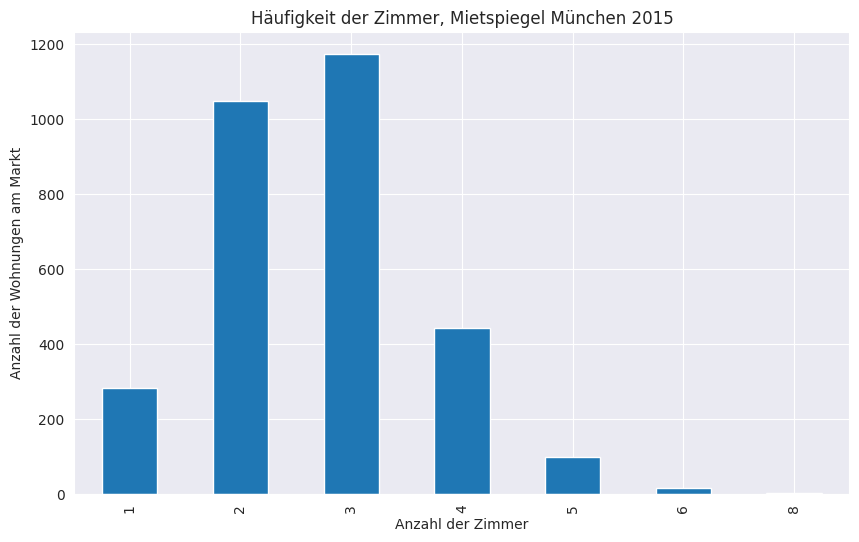

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Häufigkeit der Zimmer, Mietspiegel München 2015")
mietspiegel['rooms'].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Anzahl der Zimmer")
plt.ylabel("Anzahl der Wohnungen am Markt")
plt.show()

(3) Erstellen Sie eine 5-Number-Summary (Fünf-Punkte–Zusammenfassung) für die Variable Baujahr (bj). 

In [73]:
mietspiegel['bj'].describe().loc[['min', '25%', '50%', '75%', 'max']]

min    1918.0
25%    1957.5
50%    1957.5
75%    1983.0
max    2012.5
Name: bj, dtype: float64

(4) Berechnen Sie die 5-Number-Summary für die Variablen Nettomiete (nm) und Nettomiete/Quadratmeter (nmqm), jeweils getrennt für Wohnungen, die vor bzw. nach dem Jahr 1958 gebaut wurden. Erstellen Sie ebenfalls die dazugehörigen Boxplots. Interpretieren Sie Ihre Ergebnisse. (1-3 Sätze)

In [74]:
print(mietspiegel.groupby(mietspiegel['bj'] >= 1958).describe().loc[:, ['nm', 'nmqm']].loc(axis=1)[pd.IndexSlice[:, 'min':'max']])

           nm                                nmqm                            
          min    25%     50%    75%     max   min    25%    50%    75%    max
bj                                                                           
False  174.75  511.0  677.36  872.0  3200.0  2.47  8.380  10.28  12.19  22.13
True   187.63  590.0  735.00  950.0  6000.0  4.24  9.735  11.17  12.62  21.01


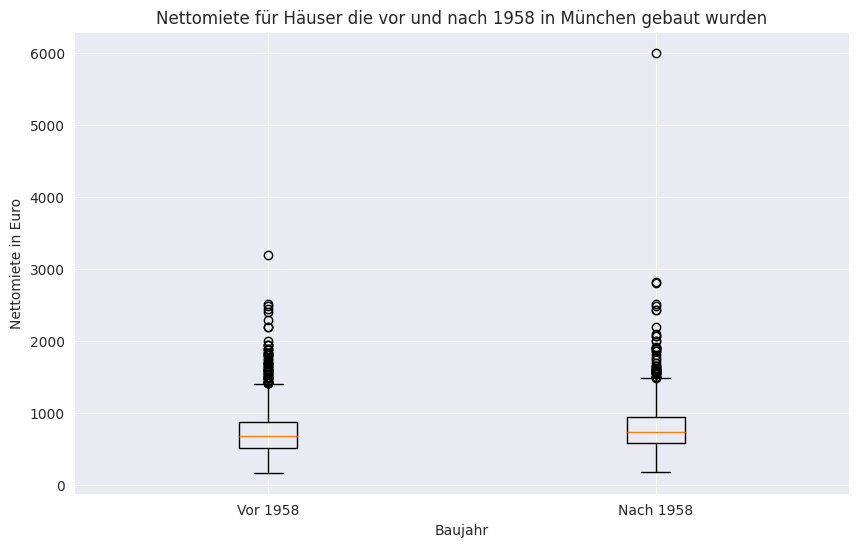

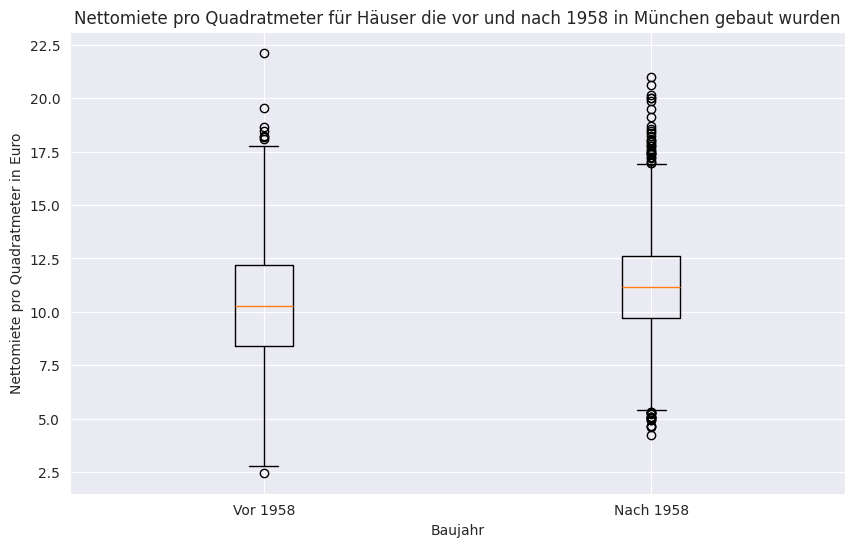

In [78]:
# Subsetting
miete_baujahr_vor_1958 = mietspiegel[mietspiegel['bj'] < 1958][['nm', 'nmqm']]
miete_baujahr_nach_1958 = mietspiegel[mietspiegel['bj'] >= 1958][['nm', 'nmqm']]

# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot([miete_baujahr_vor_1958['nm'], miete_baujahr_nach_1958['nm']], labels=['Vor 1958', 'Nach 1958'])
plt.title('Nettomiete für Häuser die vor und nach 1958 in München gebaut wurden')
plt.ylabel('Nettomiete in Euro')
plt.xlabel('Baujahr')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot([miete_baujahr_vor_1958['nmqm'], miete_baujahr_nach_1958['nmqm']], labels=['Vor 1958', 'Nach 1958'])
plt.title('Nettomiete pro Quadratmeter für Häuser die vor und nach 1958 in München gebaut wurden')
plt.ylabel('Nettomiete pro Quadratmeter in Euro')
plt.xlabel('Baujahr')
plt.grid(True)
plt.show()

Die Nettomiete und Nettomiete/Quadratmeter sind bei Wohnungen nach 1958 tendenziell höher als bei Wohnungen vor 1958. Die maximale Nettomiete hat sich sogar fast verdoppelt, allerdings ist die maximale Nettomiete pro Quadratmeter gesunken. 

(5) Führen Sie die Analyse aus Schritt (4) noch einmal durch, allerdings schichten Sie hier Ihre Analyse nicht mehr nach "Baujahr vor oder nach 1958" sondern nach der Anzahl der Räume (rooms). Das bedeutet, dass Sie Boxplots der Nettomiete (nm), der Nettomiete/Quadratmeter (nmqm) in Abhängigkeit der Raumanzahl erstellen. Interpretieren Sie Ihre Ergebnisse. (1-3 Sätze).

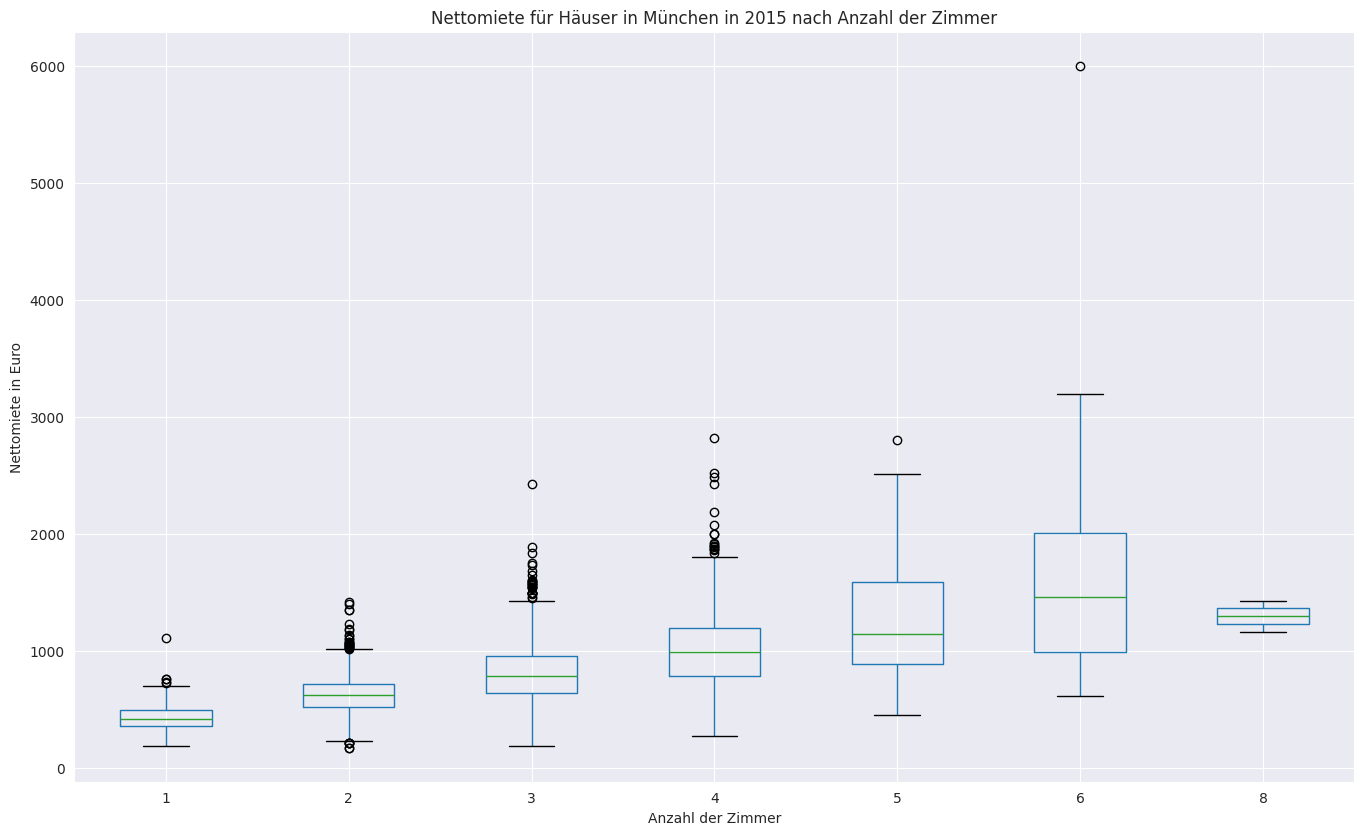

<Figure size 1600x1000 with 0 Axes>

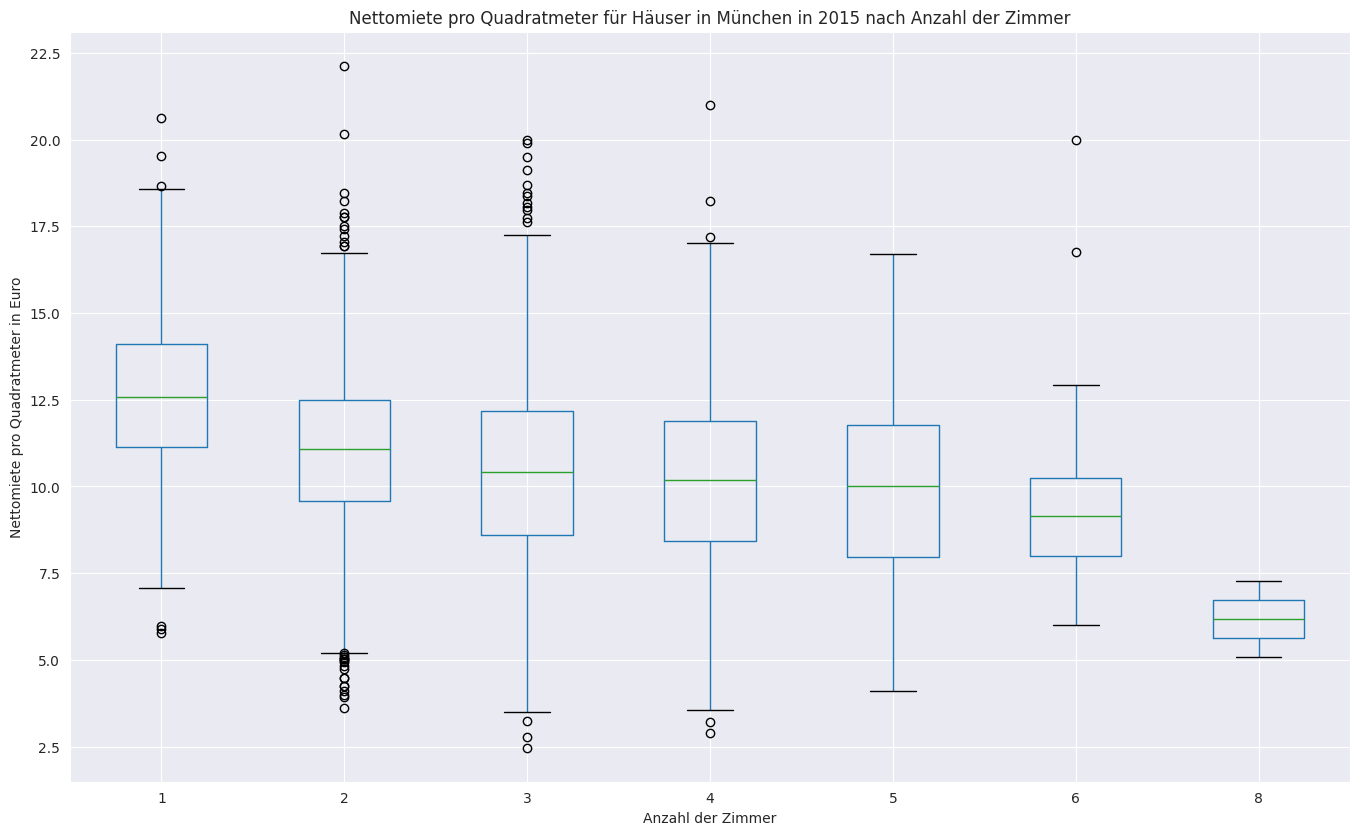

In [87]:
# Subsetting
miete_rooms_netto_miete = mietspiegel.set_index('rooms')[['nm']]
miete_rooms_netto_miete_pro_quadratmeter = mietspiegel.set_index('rooms')[['nmqm']]


# Plotting netto_miete
miete_rooms_netto_miete.boxplot(by='rooms', figsize=(16, 10))
plt.suptitle('') # remove the automatic title
plt.title('Nettomiete für Häuser in München in 2015 nach Anzahl der Zimmer')
plt.ylabel('Nettomiete in Euro')
plt.xlabel('Anzahl der Zimmer')
plt.grid(True)
plt.show()

# Plotting netto_miete_pro_quadratmeter
plt.figure(figsize=(16, 10))
miete_rooms_netto_miete_pro_quadratmeter.boxplot(by='rooms', figsize=(16, 10))
plt.suptitle('') # remove the automatic title
plt.title('Nettomiete pro Quadratmeter für Häuser in München in 2015 nach Anzahl der Zimmer')
plt.ylabel('Nettomiete pro Quadratmeter in Euro')
plt.xlabel('Anzahl der Zimmer')
plt.grid(True)
plt.show()

 Interpretation:
- Wir sehen, dass die Nettomiete pro Zimmeranzahl fast linear zwischen 1 und 6 Zimmern ansteigt, mit Ausnahme von 8 Mietobjekten. Die Nettomiete pro Quadratmeter hingegen sinkt je nach Zimmeranzahl. Für Wohnungen/Häuser mit 1 bis 3 Zimmern sinkt sie, zwischen 3 und 5 Zimmern bleibt sie konstant und sinkt deutlich für 8 Zimmer.
- Je mehr Zimmer, desto höher die absolute Miete, jedoch zahlt man pro Zimmer deutlich weniger, wenn man sich in einem Mietobjekt mit 6 Zimmern oder mehr befindet.
- Daraus lässt sich interpretieren, dass es für Studenten wahrscheinlich günstiger ist, ein Zimmer in einem Haus/Wohnung mit mindestens 6 Zimmern zu mieten, aber besonders teuer ist, eine Einzimmerwohnung zu mieten.

(6) Erkunden Sie nun etwaige Zusammenhänge zwischen den Variablen Nettomiete (nm), Nettomiete/Quadratmeter (nmqm), Wohnfläche (wfl) und Anzahl der Räume (rooms), indem Sie einen [Scatter-Matrix-Plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html) erstellen.

array([[<Axes: xlabel='nm', ylabel='nm'>,
        <Axes: xlabel='nmqm', ylabel='nm'>,
        <Axes: xlabel='wfl', ylabel='nm'>,
        <Axes: xlabel='rooms', ylabel='nm'>],
       [<Axes: xlabel='nm', ylabel='nmqm'>,
        <Axes: xlabel='nmqm', ylabel='nmqm'>,
        <Axes: xlabel='wfl', ylabel='nmqm'>,
        <Axes: xlabel='rooms', ylabel='nmqm'>],
       [<Axes: xlabel='nm', ylabel='wfl'>,
        <Axes: xlabel='nmqm', ylabel='wfl'>,
        <Axes: xlabel='wfl', ylabel='wfl'>,
        <Axes: xlabel='rooms', ylabel='wfl'>],
       [<Axes: xlabel='nm', ylabel='rooms'>,
        <Axes: xlabel='nmqm', ylabel='rooms'>,
        <Axes: xlabel='wfl', ylabel='rooms'>,
        <Axes: xlabel='rooms', ylabel='rooms'>]], dtype=object)

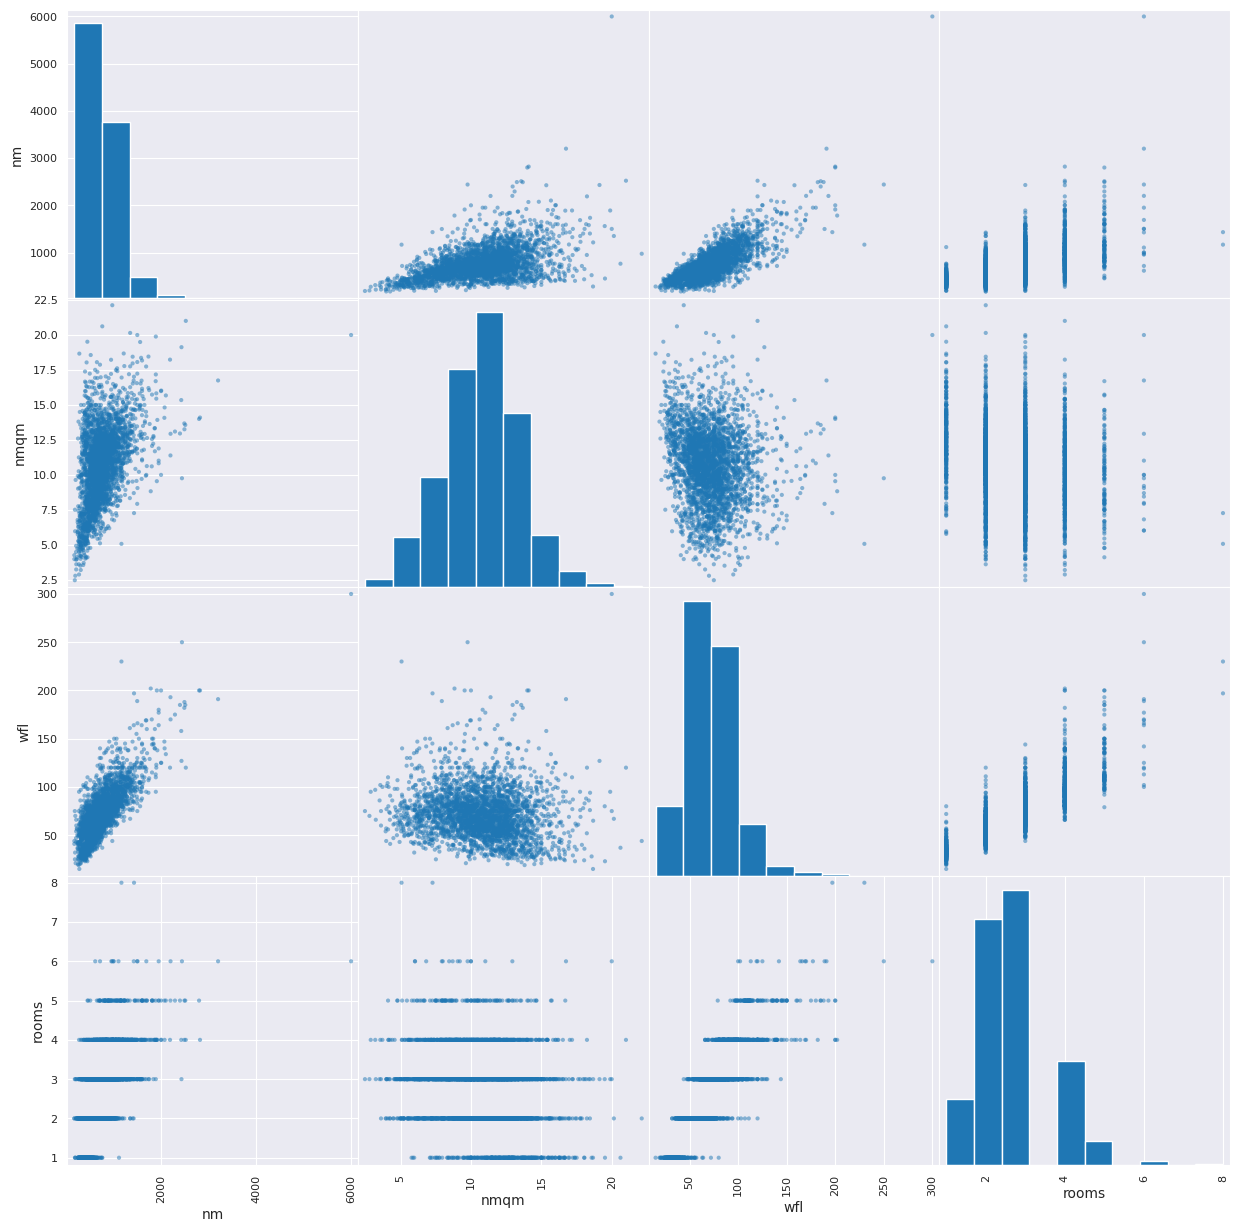

In [88]:
pd.plotting.scatter_matrix(mietspiegel.loc[:, ['nm', 'nmqm', 'wfl', 'rooms']], figsize=(15, 15))

(7) Interpretieren Sie den Ihren Plot aus Schritt 6: Sehen Sie Zusammenhänge zwischen einzelnen Variablen? (1-3 Sätze)

Zwischen der Nettomiete und der Wohnfläche besteht ein starker Zusammenhang, während bei der Nettomiete pro Quadratmeter und der Wohnfläche kaum ein Zusammenhang zu erkennen ist. Die Anzahl der Zimmer und die Wohnfläche sind erwartungsgemäß ebenfalls stark korreliert.

(8) Berechnen Sie Pearsons Korrelationskoeffizienten für alle Paare von Variablen aus Schritt (6). Schätzen Sie ein, welche Variablen miteinander schwach, mittel oder stark korreliert sind. Interpretieren Sie Ihre Ergebnisse (1-3 Sätze). Achten Sie dabei unter anderem auf Ihren Befund zwischen Zimmerzahl und Nettomiete/Quadratmeter sowie Nettomiete und Wohnfläche.

In [ ]:
mietspiegel.loc[:, ['nm', 'nmqm', 'wfl', 'rooms']].corr(method='pearson')

Zimmeranzahl und Wohnfläche sind erwartungsgemäß stark positiv korreliert. Auch die Nettomiete und die Wohnfläche sind positiv korreliert, wenn auch etwas schwächer (mittlere Korrelation). Bei der Nettomiete pro Quadratmeter und der Wohnfläche liegt kaum eine Korrelation vor.

(9) Berechnen Sie Spearmans Korrelationskoeffizient für alle Paare von Variablen aus Schritt (6). Vergleichen Sie die Werte, die Sie erhalten, mit den Werten von Pearsons Korrelationskoeffizienten aus Schritt (8). Für welches Feature-Paar sehen Sie in beiden Koeffizienten die größten Unterschiede? Wie interpretieren Sie diesen Unterschied?

- Der **Pearsons Korrelationskoeffizient** charakterisiert der Stärke linearer Zusammenhänge. 
- Der **Spearman Korrelationskoeffizient** charakterisiert der Stärke monotoner Zusammenhänge.

In [ ]:
mietspiegel.loc[:, ['nm', 'nmqm', 'wfl', 'rooms']].corr(method='spearman')

Der stärkste Unterschied liegt bei dem Zusammenhang der Nettomiete pro Quadratmeter und der Wohnfläche vor. 

### 4.4 Pearsons Korrelationskoeffizient und Invarianz

Betrachten Sie die beiden Merkmale $X$ und $Y$ sowie ihre linearen Transformationen

$$\tilde{X} = a_X X + b_X, \quad a_X\neq 0$$

und

$$\tilde{Y} = a_Y Y + b_Y, \quad a_Y\neq 0$$


**Ihre Aufgaben**

(1) Schlagen Sie in der Vorlesung die Definition von Pearsons Korrelationskoeffizienten nach.

**Pearsons Korrelationskoeffizient** (Charakterisierung der Stärke linearer Zusammenhänge) $r$ ist der Quotient aus der Kovarianz $\tilde{s}_{XY}$ und der Standardabweichung der Stichproben $\tilde{s}_X \tilde{s}_Y$. 
$$
r = \frac{\tilde{s}_{XY}}{\tilde{s}_X \tilde{s}_Y}
$$
Kovarianz: $$
\tilde{s}_{XY} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})
$$
Standardabweichung der Stichprobe $X$: $$
\tilde{s}_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \overline{x})^2}
$$
Er misst die Stärke des linearen Zusammenhangs. Je näher die Messwerte an einer Geraden liegen, desto näher liegt $r$ bei $1$ (positive Steigung) oder bei $-1$ (negative Steigung).
Bei $|r|< 0.5$ spricht man von einer schwachen Korrelation, bei $0.5 \leq |r| < 0.8$ von einer mittleren Korrelation und bei $|r| \geq 0.8$ von einer starken Korrelation.

(2) Zeigen Sie, dass für Pearsons Korrelationskoeffizient $r_{XY}$ gilt:

$$|r_{\tilde{X}\tilde{Y}}| = |r_{XY}|$$

Diese Invarianz unter linearen Transformationen wird auch *Maßstabsunabhängigkeit* genannt.